### Stock Sentiment Analysis

Build a machine learning model to predict stock sentiment(positive/negative movement) based on top financial news headlines

In [81]:
import pandas as pd

df = pd.read_csv("Combined_News.csv")

In [82]:
df.head()

Date  Label                                               Top1  \
0  2008-08-08      0  b"Georgia 'downs two Russian warplanes' as cou...   
1  2008-08-11      1  b'Why wont America and Nato help us? If they w...   
2  2008-08-12      0  b'Remember that adorable 9-year-old who sang a...   
3  2008-08-13      0  b' U.S. refuses Israel weapons to attack Iran:...   
4  2008-08-14      1  b'All the experts admit that we should legalis...   

                                                Top2  \
0            b'BREAKING: Musharraf to be impeached.'   
1        b'Bush puts foot down on Georgian conflict'   
2                 b"Russia 'ends Georgia operation'"   
3  b"When the president ordered to attack Tskhinv...   
4  b'War in South Osetia - 89 pictures made by a ...   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   
1  b"Jewish Georgian minister: Thanks to Israeli ...   
2  b'"If we had no sexual harassment we would hav...   
3  b' Israel clears troops who killed Reuters cam...   
4  b'Swedish wrestler Ara Abrahamian throws away ...   

                                                Top4  \
0  b'Russian tanks are moving towards the capital...   
1  b'Georgian army flees in disarray as Russians ...   
2  b"Al-Qa'eda is losing support in Iraq because ...   
3  b'Britain\'s policy of being tough on drugs is...   
4  b'Russia exaggerated the death toll in South O...   

                                                Top5  \
0  b"Afghan children raped with 'impunity,' U.N. ...   
1      b"Olympic opening ceremony fireworks 'faked'"   
2  b'Ceasefire in Georgia: Putin Outmaneuvers the...   
3  b'Body of 14 year old found in trunk; Latest (...   
4  b'Missile That Killed 9 Inside Pakistan May Ha...   

                                                Top6  \
0  b'150 Russian tanks have entered South Ossetia...   
1  b'What were the Mossad with fraudulent New Zea...   
2  b'Why Microsoft and Intel tried to kill the XO...   
3  b'China has moved 10 *million* quake survivors...   
4  b"Rushdie Condemns Random House's Refusal to P...   

                                                Top7  \
0  b"Breaking: Georgia invades South Ossetia, Rus...   
1  b'Russia angered by Israeli military sale to G...   
2  b'Stratfor: The Russo-Georgian War and the Bal...   
3  b"Bush announces Operation Get All Up In Russi...   
4  b'Poland and US agree to missle defense deal. ...   

                                                Top8  ...  \
0  b"The 'enemy combatent' trials are nothing but...  ...   
1  b'An American citizen living in S.Ossetia blam...  ...   
2  b"I'm Trying to Get a Sense of This Whole Geor...  ...   
3             b'Russian forces sink Georgian ships '  ...   
4  b'Will the Russians conquer Tblisi? Bet on it,...  ...   

                                               Top16  \
0  b'Georgia Invades South Ossetia - if Russia ge...   
1  b'Israel and the US behind the Georgian aggres...   
2  b'U.S. troops still in Georgia (did you know t...   
3                      b'Elephants extinct by 2020?'   
4  b'Bank analyst forecast Georgian crisis 2 days...   

                                               Top17  \
0                b'Al-Qaeda Faces Islamist Backlash'   
1  b'"Do not believe TV, neither Russian nor Geor...   
2       b'Why Russias response to Georgia was right'   
3  b'US humanitarian missions soon in Georgia - i...   
4  b"Georgia confict could set back Russia's US r...   

                                               Top18  \
0  b'Condoleezza Rice: "The US would not act to p...   
1  b'Riots are still going on in Montreal (Canada...   
2  b'Gorbachev accuses U.S. of making a "serious ...   
3             b"Georgia's DDOS came from US sources"   
4  b'War in the Caucasus is as much the product o...   

                                               Top19  \
0  b'This is a busy day:  The European Union has ...   
1    b'China to overtake US as largest manufac

    The data consists of 27 columns: date column, target column (Label), and 25 explanatory features
    Date ranges from 2008 to 2016, Label column has two categories; positive/negative. 
    Class 1 - the stock price increased
    Class 0 - the stock price stayed the same or decreased
    

In [83]:
# Data exploration
df.info()

print(df.iloc[:, 2][:2])

# There are no missing values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1989 non-null   object
 1   Label   1989 non-null   int64 
 2   Top1    1989 non-null   object
 3   Top2    1989 non-null   object
 4   Top3    1989 non-null   object
 5   Top4    1989 non-null   object
 6   Top5    1989 non-null   object
 7   Top6    1989 non-null   object
 8   Top7    1989 non-null   object
 9   Top8    1989 non-null   object
 10  Top9    1989 non-null   object
 11  Top10   1989 non-null   object
 12  Top11   1989 non-null   object
 13  Top12   1989 non-null   object
 14  Top13   1989 non-null   object
 15  Top14   1989 non-null   object
 16  Top15   1989 non-null   object
 17  Top16   1989 non-null   object
 18  Top17   1989 non-null   object
 19  Top18   1989 non-null   object
 20  Top19   1989 non-null   object
 21  Top20   1989 non-null   object
 22  Top21   1989 non-null   

In [84]:
# Split the data into train and test sets based on the date column (before 2015 for training, after 2014 for testing)
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [ ]:
print(train.shape)
print(test.shape)

In [ ]:
# Select the explanatory features
data=train.iloc[:,2:27]
data.head()

In [87]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [88]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Replace special characters but keep important financial symbols
    text = re.sub('[^a-zA-Z0-9$%+\-\.]', ' ', text)
    
    # Replace multiple spaces with single space
    text = re.sub('\s+', ' ', text).strip()
    
    return text



def preprocess_text(text):

    # Remove punctuations and numbers
    
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove extra whitespaces
    text = re.sub('\s+', ' ', text).strip()
    
    # Tokenize
    tokens = text.split()
    
    # Remove stopwords and lemmatize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)

In [89]:
# Apply preprocessing to each headline
headlines = []      # an empty list that will store processed data
for row in range(0, len(data.index)):      # starts a loop that iterates through each row of the dataframe
    row_text = ' '.join(str(x) for x in data.iloc[row, 0:25])      # For each row: data.iloc[row, 0:25] selects all columns from 0 to 24 (which correspond to the Top1, Top2, ..., Top25 news headlines)
                                                                   # str(x) - converts each cell value to a string. 
                                                                   # ' '.join(...) - combines all these headlines into a single string, separating them with spaces. This creates one consolidated text document for each day, containing all headlines from that day
    headlines.append(preprocess_text(row_text))                    # Passes the combined headline text through the preprocess_text() function (which performs operations like replacing special characters)

In [90]:
headlines[1]

'b why wont america and nato help us if they wont help us now why did we help them in iraq b bush puts foot down on georgian conflict b jewish georgian minister thanks to israeli training we re fending off russia b georgian army flees in disarray as russians advance - gori abandoned to russia without a shot fired b olympic opening ceremony fireworks faked b what were the mossad with fraudulent new zealand passports doing in iraq b russia angered by israeli military sale to georgia b an american citizen living in s.ossetia blames u.s. and georgian leaders for the genocide of innocent people b welcome to world war iv now in high definition b georgia s move a mistake of monumental proportions b russia presses deeper into georgia u.s. says regime change is goal b abhinav bindra wins first ever individual olympic gold medal for india b u.s. ship heads for arctic to define territory b drivers in a jerusalem taxi station threaten to quit rather than work for their new boss - an arab b the fre

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Try TF-IDF with unigrams and bigrams
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)      # For bigrams only, use ngram_range = (2, 2)
train_features = vectorizer.fit_transform(headlines)

In [92]:
# Model Optimization
from sklearn.model_selection import GridSearchCV

# Parameter grid for RandomForest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],  # Reduce max depth
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 8],  # Add this parameter
    'criterion': ['gini', 'entropy']
}

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit

rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid,
    cv=tscv,  # Use time series split
    scoring='accuracy',
    n_jobs=-1
)


grid_search.fit(train_features, train['Label'])

# Best model
best_rf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 15, 'n_estimators': 100}


In [94]:
best_rf

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, min_samples_leaf=4, min_samples_split=15,
                       random_state=42)

In [95]:
# Train accuracy
train_predictions = best_rf.predict(train_features)
train_accuracy = accuracy_score(train['Label'], train_predictions)
print(train_accuracy)

0.9844337090713903


In [96]:
# Preprocess the test set
test_headlines = []
for row in range(0, len(test.index)):
    row_text = ' '.join(str(x) for x in test.iloc[row, 2:27])
    test_headlines.append(preprocess_text(row_text))

# We use transform(), not fit_transform() to use the same vocabulary as training
test_features = vectorizer.transform(test_headlines)
test_features

<378x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 116298 stored elements in Compressed Sparse Row format>

In [97]:
# Make predictions with the best model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

predictions = best_rf.predict(test_features)
conf_mat = confusion_matrix(test["Label"], predictions)
print(conf_mat)

[[150  36]
 [ 26 166]]


In [98]:
score = accuracy_score(test["Label"], predictions)
print(score)

0.8359788359788359


In [ ]:
report=classification_report(test['Label'],predictions)
print(report)

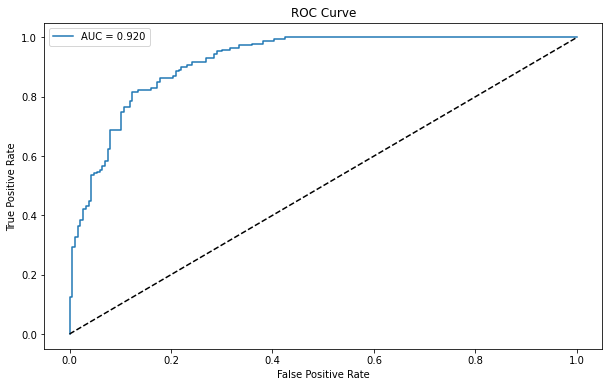

In [100]:
# Model Evaluation

from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt

# For ROC curve
probabilities = best_rf.predict_proba(test_features)[:, 1]
fpr, tpr, _ = roc_curve(test['Label'], probabilities)
auc = roc_auc_score(test['Label'], probabilities)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [101]:
# Feature importance analysis

import numpy as np

feature_names = vectorizer.get_feature_names_out()
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the top 20 features
print("Top features:")
for i in range(20):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

Top features:
on: 0.0048
run: 0.0047
sanctions: 0.0047
000: 0.0039
hundred: 0.0037
and: 0.0033
canadian: 0.0033
remove: 0.0032
of: 0.0032
the: 0.0032
qatar: 0.0031
world: 0.0030
congo: 0.0029
verdict: 0.0029
over: 0.0029
scandal: 0.0029
did: 0.0028
security council: 0.0028
at: 0.0027
as: 0.0027
